In [37]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
df = pd.read_csv('Dataset.csv')
#df.replace(to_replace ="BENIGN", value = "NORMAL", inplace = True)
#df.to_csv('Dataset.csv', index = False)
print('=====Network Traffic Data=========')
df_data = df.drop(['Label'],axis=1)
print(df_data)
print('=====Attack Types=========')
df.Label.value_counts()

=====Network Traffic Data=========
       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                213                  2                       2   
1             102324                  3                       5   
2           60087781                 18                      20   
3              47472                  1                       1   
4              47596                  1                       1   
...              ...                ...                     ...   
56584            234                  2                       2   
56585         133288                  2                       2   
56586       11507694                  5                       4   
56587       11507707                  8                       6   
56588       11512204                  8                       5   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                               72                          200   
1                         

NORMAL          22659
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [38]:
# Preprocessing
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)
df_pre = df.drop(['Label'],axis=1)
print('=====Data Preprocessing=========')
print(df_pre)

=====Data Preprocessing=========
       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          -0.528769          -0.068399               -0.051706   
1          -0.525990          -0.050835               -0.006630   
2           1.106792           0.212629                0.218751   
3          -0.527483          -0.085964               -0.066732   
4          -0.527480          -0.085964               -0.066732   
...              ...                ...                     ...   
56584      -0.528769          -0.068399               -0.051706   
56585      -0.525147          -0.068399               -0.051706   
56586      -0.215540          -0.015707               -0.021656   
56587      -0.215540           0.036986                0.008395   
56588      -0.215417           0.036986               -0.006630   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                        -0.030940                    -0.046472   
1                        -0.

=====Data Transformation and Feature Selection=========
[[-0.45934264 -0.47711329 -0.43087837 ... -0.054987   -0.08796292
  -0.03971855]
 [ 0.12603122  0.11071748 -0.31960206 ... -0.05500088 -0.08797043
  -0.02094604]
 [ 0.83928657  0.94446693  0.11745088 ... -0.05500058 -0.08797027
   0.26064168]
 ...
 [ 0.35541436  0.34652001  0.07967952 ... -0.0549876  -0.0878327
  -0.03971855]
 [ 1.2913529   1.34130425  0.91958872 ... -0.05498821 -0.08796292
  -0.03971855]
 [ 1.42378754  1.46621713  2.63352558 ... -0.05500119 -0.08793877
  -0.03971855]]


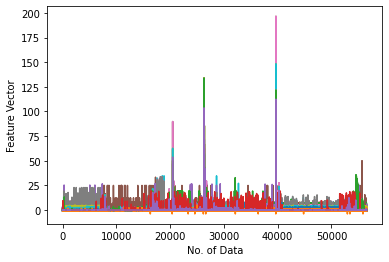

In [39]:
# Data Transformation and Feature Selection
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df_minor = df[(df['Label']==6)|(df['Label']==1)|(df['Label']==4)]
df_major = df.drop(df_minor.index)
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break 
X_fs = df[fs].values
print('=====Data Transformation and Feature Selection=========')
print(X_fs)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt  
plt.plot(X_fs)
plt.xlabel("No. of Data")
plt.ylabel("Feature Vector")
plt.title("Feature Selection")
plt.show()

['Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'BruteForce', 'BruteForce', 'Normal', 'Infiltration', 'PortScan', 'Bot', 'Infiltration', 'Infiltration', 'BruteForce', 'PortScan', 'Infiltration', 'Infiltration', 'PortScan', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'BruteForce', 'Normal', 'BruteForce', 'PortScan', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'BruteForce', 'WebAttack', 'Infiltration', 'BruteForce', 'Normal', 'BruteForce', 'PortScan', 'Infiltration', 'BruteForce', 'BruteForce', 'PortScan', 'BruteForce', 'BruteForce', 'BruteForce', 'PortScan', 'PortScan', 'BruteForce', 'BruteForce', 'BruteForce', 'BruteForce', 'Infiltration', 'BruteForce', 'PortScan', 'BruteForce', 'Infiltration', 'Infiltration', 'PortScan', 'Infiltration', 'BruteForce', 'Infiltration', 'Infiltration', 'Infiltration', '

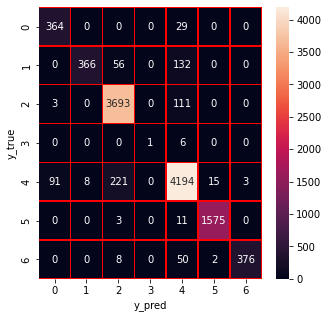

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
Resr=[]
print('=====XGBoost Classifier-Prediction Result=========')
for ii in range(0,len(y_predict)): 
    if(y_predict[ii]==0):
        Resr.append("Normal")
    elif(y_predict[ii]==1):
        Resr.append("Bot")
    elif(y_predict[ii]==2):
        Resr.append("BruteForce")
    elif(y_predict[ii]==3):
        Resr.append("DoS")
    elif(y_predict[ii]==4):
        Resr.append("Infiltration")
    elif(y_predict[ii]==5):
        Resr.append("PortScan")
    elif(y_predict[ii]==6):
        Resr.append("WebAttack")
print(Resr)
y_true=y_test
Resr1=[]
print('=====Test Label=========')
for ii in range(0,len(y_true)): 
    if(y_true[ii]==0):
        Resr1.append("Normal")
    elif(y_true[ii]==1):
        Resr1.append("Bot")
    elif(y_true[ii]==2):
        Resr1.append("BruteForce")
    elif(y_true[ii]==3):
        Resr1.append("DoS")
    elif(y_true[ii]==4):
        Resr1.append("Infiltration")
    elif(y_true[ii]==5):
        Resr1.append("PortScan")
    elif(y_true[ii]==6):
        Resr1.append("WebAttack")
print(Resr1)
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



=====Decision Tree-Prediction Result=========
['Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'Normal', 'Infiltration', 'PortScan', 'Bot', 'Infiltration', 'Infiltration', 'BruteForce', 'PortScan', 'Infiltration', 'BruteForce', 'PortScan', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'BruteForce', 'Normal', 'BruteForce', 'PortScan', 'Infiltration', 'Infiltration', 'Infiltration', 'Infiltration', 'BruteForce', 'BruteForce', 'WebAttack', 'Infiltration', 'BruteForce', 'Infiltration', 'BruteForce', 'PortScan', 'Infiltration', 'BruteForce', 'BruteForce', 'PortScan', 'BruteForce', 'BruteForce', 'BruteForce', 'PortScan', 'PortScan', 'BruteForce', 'Bot', 'BruteForce', 'BruteForce', 'Infiltration', 'BruteForce', 'PortScan', 'BruteForce', 'Infiltration', 'Infiltration', 'PortScan', 'Infiltration', 'BruteForce', 'I

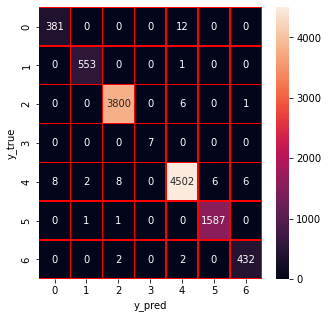

In [43]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
Resr=[]
print('=====Decision Tree-Prediction Result=========')
for ii in range(0,len(y_predict)): 
    if(y_predict[ii]==0):
        Resr.append("Normal")
    elif(y_predict[ii]==1):
        Resr.append("Bot")
    elif(y_predict[ii]==2):
        Resr.append("BruteForce")
    elif(y_predict[ii]==3):
        Resr.append("DoS")
    elif(y_predict[ii]==4):
        Resr.append("Infiltration")
    elif(y_predict[ii]==5):
        Resr.append("PortScan")
    elif(y_predict[ii]==6):
        Resr.append("WebAttack")
print(Resr)
y_true=y_test
Resr1=[]
print('=====Test Label=========')
for ii in range(0,len(y_true)): 
    if(y_true[ii]==0):
        Resr1.append("Normal")
    elif(y_true[ii]==1):
        Resr1.append("Bot")
    elif(y_true[ii]==2):
        Resr1.append("BruteForce")
    elif(y_true[ii]==3):
        Resr1.append("DoS")
    elif(y_true[ii]==4):
        Resr1.append("Infiltration")
    elif(y_true[ii]==5):
        Resr1.append("PortScan")
    elif(y_true[ii]==6):
        Resr1.append("WebAttack")
print(Resr1)
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()